In [59]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = '../9.Regression/iris.data'
data = pd.read_csv(path, header=None)

In [61]:
x, y = data[[0,1]], pd.Categorical(data[4]).codes
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, \
                                                   train_size=0.6)

## SVM建模

In [62]:
clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
print clf.score(x_train, y_train)
print u'训练集准确率：', accuracy_score(y_train, clf.predict(x_train))
print clf.score(x_test, y_test)
print u'测试集准确率：', accuracy_score(y_test, clf.predict(x_test))

0.8
训练集准确率： 0.8
0.8
测试集准确率： 0.8


In [64]:
# decision_function
print x_train[:5]
print 'decision_function:\n', clf.decision_function(x_train)
print '\npredict:\n', clf.predict(x_train)

       0    1
11   4.8  3.4
113  5.7  2.5
123  6.3  2.7
12   4.8  3.0
2    4.7  3.2
decision_function:
[[ 2.22976777  0.93523902 -0.16500679]
 [-0.12204492  2.11891317  1.00313176]
 [-0.23499985  1.11410221  2.12089764]
 [ 2.16897433  0.99886921 -0.16784355]
 [ 2.22326299  0.96255343 -0.18581642]
 [-0.23718865  1.07538094  2.16180772]
 [ 2.27755165  0.92623764 -0.20378929]
 [-0.14162089  1.05737818  2.08424271]
 [-0.20679194  1.04356584  2.1632261 ]
 [-0.26977418  1.06847477  2.20129941]
 [-0.07644985  2.07119052  1.00525933]
 [-0.23937746  1.03665967  2.20271779]
 [-0.11772895  1.05287749  2.06485146]
 [ 2.21888538 -0.11488911  0.89600373]
 [-0.23931582  2.18013788  1.05917794]
 [-0.22849507  1.0867878   2.14170727]
 [-0.23718865  1.07538094  2.16180772]
 [ 1.01480194  2.11922344 -0.13402538]
 [-0.1438097   1.01865691  2.12515278]
 [-0.07426104  2.10991179  0.96434926]
 [ 2.1320112  -0.08547949  0.95346829]
 [ 2.16028075  0.98746236 -0.14774311]
 [ 2.24058852 -0.15811106  0.91752255]


## 绘图

In [65]:
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = clf.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)

In [66]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [67]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

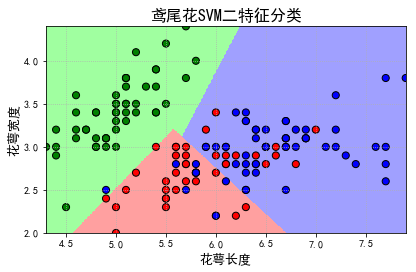

In [68]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)
# plt.scatter(x_test[0], x_test[1], s=120 ,zorder=10)
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()